## Moduli

In [1]:
# Importa moduli
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import math

In [2]:
# Stile dei grafici
plt.style.use(['science', 'notebook', 'grid'])

## Variabili globali

In [3]:
# Vettore degli 1/N
N_min = 10
N_max = 100
step = 10
one_over_N = [1/n for n in range(N_min, N_max + step, step)]
print(one_over_N)

[0.1, 0.05, 0.03333333333333333, 0.025, 0.02, 0.016666666666666666, 0.014285714285714285, 0.0125, 0.011111111111111112, 0.01]


## Lettura file di testo

In [4]:
scarto_trapezio = []

with open('scarto_trapezio.txt', 'r') as f:
    while True:
        line = f.readline()
        line = line.strip()
        if not line:
            break
        scarto_trapezio.append(float(line))
        
print(scarto_trapezio)

[4.333355858519781, 0.811654391935178, 0.341115229968011, 0.187345579817617, 0.118325983346722, 0.081484922933839, 0.059521268383861, 0.045378693446594, 0.035739318985975, 0.028875392559087]


In [5]:
scarto_simpson = []

with open('scarto_simpson.txt', 'r') as f:
    while True:
        line = f.readline()
        line = line.strip()
        if not line:
            break
        scarto_simpson.append(float(line))

print(scarto_simpson)

[5.124558188727917, 0.364739846030943, 0.08324646629066, 0.040903932030631, 0.026462052876866, 0.019482748879909, 0.01541169874028, 0.012749811196073, 0.010873300083944, 0.009478712600952]


## Plot trapezio (scarto dal valore analitico dell'integrale in funzione di 1/N)

In [6]:
x_min = 0.01
x_max = 0.1
points = 1000
x_lin = np.linspace(x_min, x_max, points)
x = np.array(one_over_N)
y = np.array(scarto_trapezio)

In [7]:
# Estrazione dei parametri con fit lineare
x_lin_log = np.log10(x_lin)
x_log = np.log10(x)
y_log = np.log10(y)

m, b = np.polyfit(x_log, y_log, 1)
print("Coefficiente angolare: " + str(m))
print("Quota: " + str(b))

Coefficiente angolare: 2.1494259573690786
Quota: 2.737508028596486


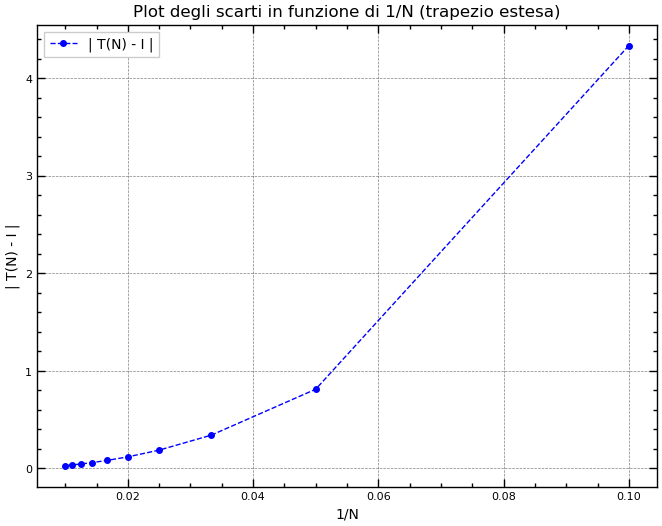

In [8]:
plt.title('Plot degli scarti in funzione di 1/N (trapezio estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| T(N) - I |', fontsize=10) # Asse y

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('trapezio_grafico.png', dpi=200)
plt.show()

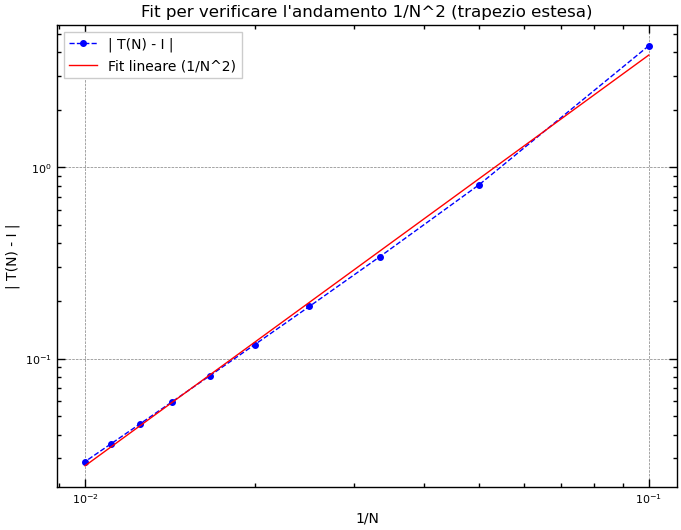

In [9]:
plt.title('Fit per verificare l\'andamento 1/N^2 (trapezio estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| T(N) - I |', fontsize=10) # Asse y
plt.xscale('log')
plt.yscale('log')

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')
plt.plot(x_lin, 10**(m*x_lin_log + b), '-', color='red', lw=1.0, ms=4, label='Fit lineare (1/N^2)')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('trapezio_grafico_fit.png', dpi=200)
plt.show()

## Plot Simpson (scarto dal valore analitico dell'integrale in funzione di 1/N)

In [10]:
x = np.array(one_over_N)
y = np.array(scarto_simpson)

In [11]:
# Estrazione dei parametri con fit lineare
x_log = np.log(x)
y_log = np.log(y)

m, q = np.polyfit(x_log, y_log, 1)
print("Coefficiente angolare: " + str(m))
print("Quota: " + str(b))

Coefficiente angolare: 2.6438512717125753
Quota: 2.737508028596486


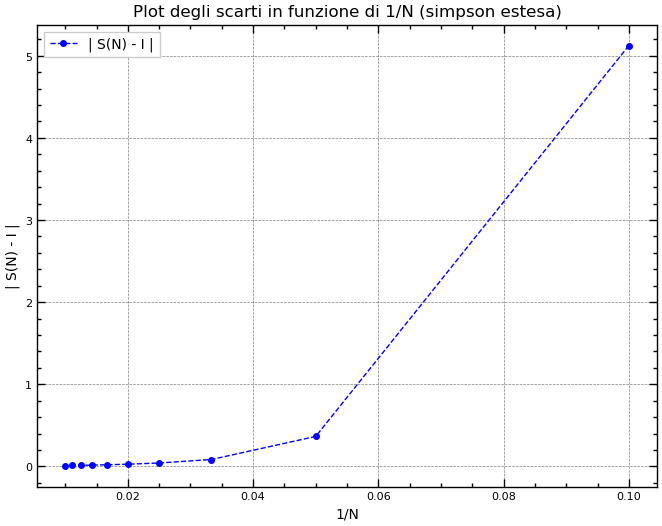

In [12]:
plt.title('Plot degli scarti in funzione di 1/N (simpson estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| S(N) - I |', fontsize=10) # Asse y

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| S(N) - I |')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('simpson_grafico.png', dpi=200)
plt.show()

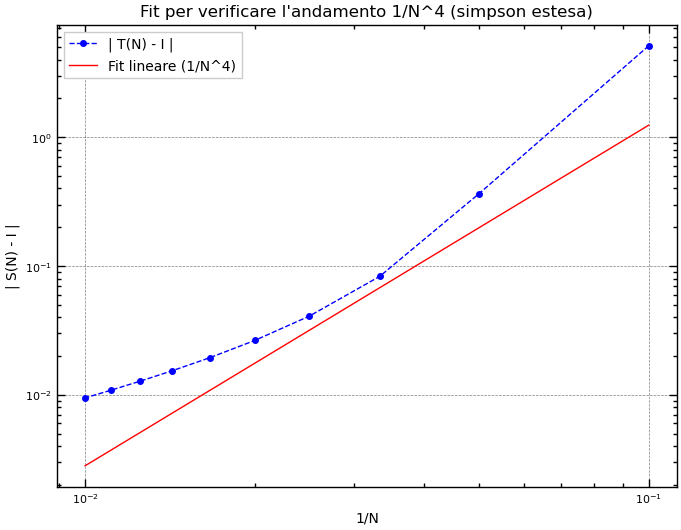

In [13]:
plt.title('Fit per verificare l\'andamento 1/N^4 (simpson estesa)', fontsize=12)

plt.gca().tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('1/N', fontsize=10) # Asse x
plt.ylabel('| S(N) - I |', fontsize=10) # Asse y
plt.xscale('log')
plt.yscale('log')

plt.plot(x, y, 'o--', color='blue', lw=1.0, ms=4, label='| T(N) - I |')
plt.plot(x_lin, 10**(m*x_lin_log + b), '-', color='red', lw=1.0, ms=4, label='Fit lineare (1/N^4)')

plt.legend(fancybox=False, fontsize=10)

plt.savefig('simpson_grafico_fit.png', dpi=200)
plt.show()